In [1]:
import matplotlib.pyplot as plt

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes
import util

#importa o arquivo e extrai as features
Xfeatures, Y = util.extract_features('datasets/everything.csv')

In [3]:
import svmutil
from svmutil import svm_read_problem
from svmutil import svm_problem
from svmutil import svm_parameter
from svmutil import svm_train
from svmutil import svm_predict
from svmutil import svm_save_model


In [4]:
### Classificador - Kernel linear ###

# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
Xk, Yk = Xfeatures[idx_perm, :], Y[idx_perm]

# define a porcentagem de dados que irao compor o conjunto de treinamento
pTrain = 0.8 

# obtem os indices dos dados da particao de treinamento e da particao de teste
train_index, test_index = util.stratified_holdOut(Yk, pTrain)

X_train, X_test = Xk[train_index, :], Xk[test_index, :];
Y_train, Y_test = Yk[train_index], Yk[test_index];

train_index, val_index = util.stratified_holdOut(Y_train, pTrain)

Xtrain, Xvalid = X_train[train_index, :], X_train[val_index, :]
Ytrain, Yvalid = Y_train[train_index], Y_train[val_index]

print('Numero de dados de validação: %d' %(Xvalid.shape[0]))

# Treinamento:
custo = 26.0
kernel = 0 # kernel linear
model = svm_train(Ytrain, Xtrain, '-c %f -t %d' %(custo, kernel))

# Predição:
p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)

Numero de dados de validação: 444
Accuracy = 82.6577% (367/444) (classification)


In [8]:
def gridSearch(X, Y, Xval, Yval, kernel):
    """
    Retorna o melhor valor para os parâmetros custo e gamma do SVM radial.
    
    Parâmetros
    ----------
    X : matriz com os dados de treinamento
    
    y : vetor com classes de cada dados de treinamento
    
    Xval : matriz com os dados de validação
    
    yval : vetor com as classes dos dados de validação
    
    Retorno
    -------
    custo, gamma : os melhores valores para os parêmetros custo e gamma.
    
     """
    
    #inicializa as variáveis que deverão ser retornadas pela função
    custo = 1000
    gamma = 1000
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Complete esta função para retornar os melhores valores de C e gamma com base
    # nos dados do conjunto de validação.
    # Você pode usar a função svm_predict() para fazer a predição das classes das amostras do
    # conjunto de validação. 
    #
    # Importante
    # ----
    # Você pode calcular a acurácia usando
    # 
    #    acuracia = np.sum(classes==Yval)/len(Yval) 
    
    aux = [0.01,0.1,1,10,100]
    values = []
    acc = 0
    
    for i in range(1,9):
        for number in aux:
            values.append(i * number)
    values.sort()
    
    # Kernel linear
    if(kernel == 0):
        for aux_custo in values:
            model = svm_train(Ytrain, Xtrain, '-c %f -t %d -q' %(aux_custo, kernel))
            p_labs, p_acc, p_vals = svm_predict(Yval, Xval, model)

            if(p_acc[0] > acc):
                acc = p_acc[0]
                custo = aux_custo
    
    # Lista de valores testados para 'custo' e 'gamma' foram escolhidos com base no artigo:
    # https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
    
    if(kernel == 1 or kernel == 2):
        for i in range (-5, 16, 2):
            for j in range (-15, 4, 2):
                aux_custo = 2**j
                aux_gamma = 2**i

                model = svm_train(Y, X, '-c %f -t %d -g %f -q' %(aux_custo, kernel, aux_gamma))
                p_labs, p_acc, p_vals = svm_predict(Yval, Xval, model)

                if(p_acc[0] > acc):
                    acc = p_acc[0]
                    custo = aux_custo
                    gamma  = aux_gamma
    
    ##########################################################################

    return custo, gamma

In [9]:
def imprimeRelatorio(p_acc, kernel):
    print('\n\tAccuracy \tErro quadratico   \tCoeficiente correlacao   \tKernel')
    print('\t%1.3f      \t%1.3f      \t\t%1.3f      \t\t\t%d' % (p_acc[0], p_acc[1], p_acc[2], kernel ) )
    
    print('\t------------------------------------------------')

In [10]:
bestC_linear, bestGamma_linear = gridSearch(Xtrain, Ytrain, Xvalid, Yvalid, 0)
print('Melhores parâmetros\nLinear - C: %1.3f\n' %(bestC_linear))

Accuracy = 77.2523% (343/444) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 81.9

In [13]:
bestC_polinomial, bestGamma_polinomial = gridSearch(Xtrain, Ytrain, Xvalid, Yvalid, 1)
print('Melhores parâmetros\nPolinomial - C: %1.3f, gamma=%1.3f' %(bestC_polinomial,bestGamma_polinomial))

Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 54.955% (244/444) (classification)
Accuracy = 63.5135% (282/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 54.955% (244/444) (classification)
Accuracy = 63.5135% (282/444) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 76.8018% (341/444) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.25

In [15]:
bestC_radial, bestGamma_radial = gridSearch(Xtrain, Ytrain, Xvalid, Yvalid, 2)
print('Melhores parâmetros\nRadial - C: %1.3f, gamma=%1.3f' %(bestC_radial,bestGamma_radial))

Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 84.4595% (375/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 68.2432% (303/444) (classification)
Accuracy = 75.6757% (336/444) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52

In [16]:
### Classificador - Kernel radial ### 
# treina o classificador com o melhor custo e o melhor gamma encontrados 
# Treinamento e clasificacao com valores de kernel:

# 0 -- linear: u\'\*v
# 1 -- polynomial: (gamma\*u\'\*v + coef0)^degree
# 2 -- radial basis function: exp(-gamma\*|u-v|^2)

print('\n-----------\nSVM Classificator: \n-----------\n')

# Kernel linear:
model = svm_train(Ytrain, Xtrain, '-c %f -t %d' %(bestC_linear, 0))
p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
imprimeRelatorio(p_acc, 0)


# Kernel polinomial:
model = svm_train(Ytrain, Xtrain, '-q -c %f -t %d -g %f' %(bestC_polinomial, 1, bestGamma_polinomial))
p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
imprimeRelatorio(p_acc, 1)

# Kernel raidal:
model = svm_train(Ytrain, Xtrain, '-q -c %f -t %d -g %f' %(bestC_radial, 2, bestGamma_radial))
p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
imprimeRelatorio(p_acc, 2)
    


-----------
SVM Classificator: 
-----------

Accuracy = 84.2342% (374/444) (classification)

	Accuracy 	Erro quadratico   	Coeficiente correlacao   	Kernel
	84.234      	0.158      		0.469      			0
	------------------------------------------------
Accuracy = 77.7027% (345/444) (classification)

	Accuracy 	Erro quadratico   	Coeficiente correlacao   	Kernel
	77.703      	0.223      		0.325      			1
	------------------------------------------------
Accuracy = 84.4595% (375/444) (classification)

	Accuracy 	Erro quadratico   	Coeficiente correlacao   	Kernel
	84.459      	0.155      		0.475      			2
	------------------------------------------------


Accuracy = 100% (9/9) (classification)
Accuracy = 51.1261% (227/444) (classification)
Accuracy = 100% (10/10) (classification)
Accuracy = 48.4234% (215/444) (classification)
Accuracy = 100% (11/11) (classification)
Accuracy = 47.5225% (211/444) (classification)
Accuracy = 100% (12/12) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 92.3077% (12/13) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 54.0541% (240/444) (classification)
Accuracy = 100% (15/15) (classification)
Accuracy = 53.3784% (237/444) (classification)
Accuracy = 93.75% (15/16) (classification)
Accuracy = 50.2252% (223/444) (classification)
Accuracy = 100% (17/17) (classification)
Accuracy = 56.982% (253/444) (classification)
Accuracy = 94.4444% (17/18) (classification)
Accuracy = 51.1261% (227/444) (classification)
Accuracy = 94.7368% (18/19) (classification)
Accuracy = 48.4234% (215/444) (classification)
Accuracy = 95% (19/20

Accuracy = 72.0721% (320/444) (classification)
Accuracy = 98.0392% (100/102) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 98.0583% (101/103) (classification)
Accuracy = 70.9459% (315/444) (classification)
Accuracy = 98.0769% (102/104) (classification)
Accuracy = 70.9459% (315/444) (classification)
Accuracy = 98.0952% (103/105) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 98.1132% (104/106) (classification)
Accuracy = 71.1712% (316/444) (classification)
Accuracy = 98.1308% (105/107) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 98.1481% (106/108) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 98.1651% (107/109) (classification)
Accuracy = 71.3964% (317/444) (classification)
Accuracy = 98.1818% (108/110) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 98.1982% (109/111) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 98.

Accuracy = 76.5766% (340/444) (classification)
Accuracy = 95.7895% (182/190) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 95.8115% (183/191) (classification)
Accuracy = 76.8018% (341/444) (classification)
Accuracy = 95.8333% (184/192) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 95.8549% (185/193) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 95.8763% (186/194) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 95.3846% (186/195) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 94.898% (186/196) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 95.9391% (189/197) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 95.9596% (190/198) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 95.4774% (190/199) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 95.5

Accuracy = 79.2793% (352/444) (classification)
Accuracy = 96.4029% (268/278) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 96.4158% (269/279) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 96.4286% (270/280) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 96.4413% (271/281) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 96.4539% (272/282) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 96.1131% (272/283) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 96.1268% (273/284) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.7895% (273/285) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.8042% (274/286) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.8188% (275/287) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95

Accuracy = 95.3425% (348/365) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 95.3552% (349/366) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.3678% (350/367) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.3804% (351/368) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.393% (352/369) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.1351% (352/370) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.1482% (353/371) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.1613% (354/372) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.4424% (356/373) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 95.4545% (357/374) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 95.4667% (358/375) (classification)
Accuracy = 80.

Accuracy = 94.702% (429/453) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.7137% (430/454) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.9451% (432/455) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.9561% (433/456) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.9672% (434/457) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.7598% (434/458) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.7712% (435/459) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.5652% (435/460) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.3601% (435/461) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.3723% (436/462) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.3844% (437/463) (classification)
Accuracy = 79.955% (355/

Accuracy = 94.6396% (512/541) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.6494% (513/542) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.4751% (513/543) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.4853% (514/544) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.4954% (515/545) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.6886% (517/546) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 94.6984% (518/547) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.708% (519/548) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.7177% (520/549) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.7273% (521/550) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.7368% (522/551) (classification)
Accuracy = 80.

Accuracy = 94.1176% (592/629) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.127% (593/630) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.1363% (594/631) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.1456% (595/632) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.1548% (596/633) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.164% (597/634) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.1732% (598/635) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.1824% (599/636) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.0345% (599/637) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.0439% (600/638) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.2097% (602/639) (classification)
Accuracy = 80.6

Accuracy = 93.5844% (671/717) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 93.3148% (670/718) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 93.3241% (671/719) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 93.3333% (672/720) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 93.3426% (673/721) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 93.3518% (674/722) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 93.361% (675/723) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 93.3702% (676/724) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 93.5172% (678/725) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 93.6639% (680/726) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.5351% (680/727) (classification)
Accuracy = 80.

Accuracy = 93.0435% (749/805) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 93.0521% (750/806) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 92.9368% (750/807) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 92.9455% (751/808) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 92.9543% (752/809) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 93.2099% (755/810) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.0949% (755/811) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.1034% (756/812) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.3579% (759/813) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.4889% (761/814) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.4969% (762/815) (classification)
Accuracy = 80

Accuracy = 93.3931% (834/893) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 93.4004% (835/894) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 93.4078% (836/895) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 93.4152% (837/896) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 93.311% (837/897) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.3185% (838/898) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.5484% (841/899) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.5556% (842/900) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.5627% (843/901) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.5698% (844/902) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.6877% (846/903) (classification)
Accuracy = 81.7568

Accuracy = 93.476% (917/981) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.5845% (919/982) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.4893% (919/983) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.5976% (921/984) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.6041% (922/985) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.712% (924/986) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.7183% (925/987) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.7247% (926/988) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.731% (927/989) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.7374% (928/990) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.7437% (929/991) (classification)
Accuracy = 81.53

Accuracy = 94.4757% (1009/1068) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.4808% (1010/1069) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.5794% (1012/1070) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.5845% (1013/1071) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.5896% (1014/1072) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.5946% (1015/1073) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.5065% (1015/1074) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.5116% (1016/1075) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.6097% (1018/1076) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.6147% (1019/1077) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.4341% (1018/1078) (classification)

Accuracy = 94.3674% (1089/1154) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.1991% (1088/1155) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.2907% (1090/1156) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.2956% (1091/1157) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.3005% (1092/1158) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.3054% (1093/1159) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.3103% (1094/1160) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.2291% (1094/1161) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.2341% (1095/1162) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.239% (1096/1163) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.244% (1097/1164) (classificati

Accuracy = 94.5161% (1172/1240) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 94.5205% (1173/1241) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 94.3639% (1172/1242) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 94.3685% (1173/1243) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.373% (1174/1244) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.3775% (1175/1245) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.382% (1176/1246) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.3865% (1177/1247) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.391% (1178/1248) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.3955% (1179/1249) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.4% (1180/1250) (classificatio

Accuracy = 93.5143% (1240/1326) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.5946% (1242/1327) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.5994% (1243/1328) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.6042% (1244/1329) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.609% (1245/1330) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.6138% (1246/1331) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.7688% (1249/1332) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.6234% (1248/1333) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.5532% (1248/1334) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.5581% (1249/1335) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.488% (1249/1336) (classific

Accuracy = 93.272% (1317/1412) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.2059% (1317/1413) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.2815% (1319/1414) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.2862% (1320/1415) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.0791% (1318/1416) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.084% (1319/1417) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.0889% (1320/1418) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.0937% (1321/1419) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.0986% (1322/1420) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.1034% (1323/1421) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.1083% (1324/1422) (classific

Accuracy = 93.3912% (1399/1498) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.3956% (1400/1499) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.4667% (1402/1500) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.471% (1403/1501) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.4088% (1403/1502) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.4132% (1404/1503) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4176% (1405/1504) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4219% (1406/1505) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3599% (1406/1506) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3643% (1407/1507) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.3024% (1407/1508) (classifi

Accuracy = 93.1818% (1476/1584) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.1861% (1477/1585) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.1904% (1478/1586) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.2577% (1480/1587) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.3879% (1483/1588) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3921% (1484/1589) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3962% (1485/1590) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4004% (1486/1591) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4045% (1487/1592) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4087% (1488/1593) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4128% (1489/1594) (classif

Accuracy = 93.3533% (1559/1670) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.3573% (1560/1671) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.3612% (1561/1672) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.3652% (1562/1673) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.3692% (1563/1674) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.3731% (1564/1675) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.3771% (1565/1676) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.381% (1566/1677) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.385% (1567/1678) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.2698% (1566/1679) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.2738% (1567/1680) (classific

Accuracy = 93.1093% (1635/1756) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.9994% (1634/1757) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 93.0034% (1635/1758) (classification)
Accuracy = 84.4595% (375/444) (classification)
Accuracy = 93.0074% (1636/1759) (classification)
Accuracy = 84.4595% (375/444) (classification)
Accuracy = 93.0114% (1637/1760) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 93.0721% (1639/1761) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.9058% (1637/1762) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.9098% (1638/1763) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.8571% (1638/1764) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.8612% (1639/1765) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.8652% (1640/1766) (classif

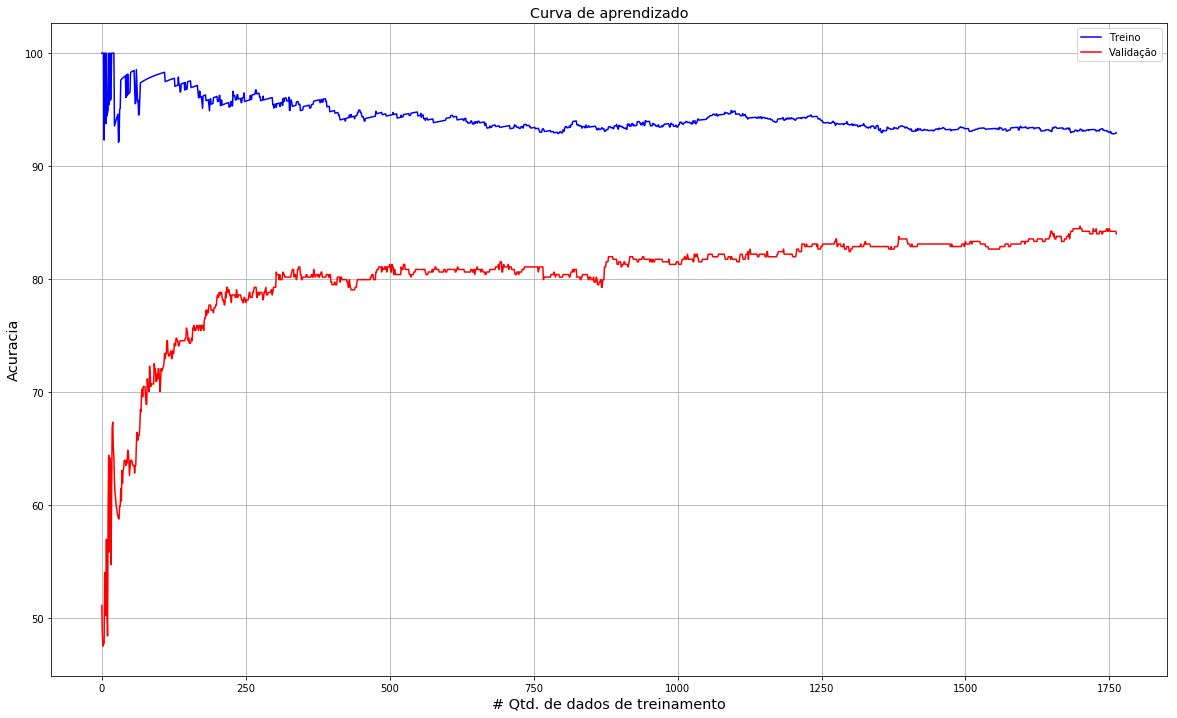

In [17]:
def curva_aprendizado_linear(Xtrain, Ytrain, Xvalid, Yvalid, Cost):
    """
    Funcao usada gerar a curva de aprendizado.
  
    Parametros
    ----------
  
    X : matriz com os dados de treinamento
  
    Y : vetor com as classes dos dados de treinamento
  
    Xval : matriz com os dados de validação
  
    Yval : vetor com as classes dos dados de validação
  
    """

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    # inicializa o parametro de regularizacao da regressao logistica
    lambda_reg = 1
        
    # Configura o numero de interacaoes da regressao logistica
    iteracoes = 500
        
    # Kernel radial
    kernel = 0
    
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para gerar o gráfico da curva de aprendizado.
    #           Comece o treinamento com as primeiras 10 amostras da base de dados de 
    #           treinamento e calcule a acuracia do classificador tanto nos dados de
    #           treinamento já apresentados, quando na base de validacao. 
    #           Depois disso, adicione mais um dado para treinamento e calcule novamente 
    #           o desempenho. Continue adicionando um dado por vez ate todos os dados de 
    #           treinamento serem usados. Nas listas perf_train e perf_val, guarde a acuracia 
    #           obtida nos dados de treinamento e na base de validacao a cada nova adicao de 
    #           dados para treinamento.
    for idx, i in enumerate(np.arange(9, len(Xtrain) - 1)):
        model = svm_train(Ytrain[:i], Xtrain[:i, :], '-c %f -t %d' %(Cost, kernel))
        
        # Teste
        p_labs, p_acc, p_vals = svm_predict(Ytrain[:i], Xtrain[:i, :], model)
        perf_train.append(p_acc[0])
        
        # Validação
        p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
        perf_val.append(p_acc[0])
    
    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado_linear(Xtrain, Ytrain, Xvalid, Yvalid, bestC_linear)

In [ ]:
def curva_aprendizado(Xtrain, Ytrain, Xvalid, Yvalid, Cost, Gamma, kernel):
    """
    Funcao usada gerar a curva de aprendizado.
  
    Parametros
    ----------
  
    X : matriz com os dados de treinamento
  
    Y : vetor com as classes dos dados de treinamento
  
    Xval : matriz com os dados de validação
  
    Yval : vetor com as classes dos dados de validação
  
    """

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    # inicializa o parametro de regularizacao da regressao logistica
    lambda_reg = 1
        
    # Configura o numero de interacaoes da regressao logistica
    iteracoes = 500
    
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para gerar o gráfico da curva de aprendizado.
    #           Comece o treinamento com as primeiras 10 amostras da base de dados de 
    #           treinamento e calcule a acuracia do classificador tanto nos dados de
    #           treinamento já apresentados, quando na base de validacao. 
    #           Depois disso, adicione mais um dado para treinamento e calcule novamente 
    #           o desempenho. Continue adicionando um dado por vez ate todos os dados de 
    #           treinamento serem usados. Nas listas perf_train e perf_val, guarde a acuracia 
    #           obtida nos dados de treinamento e na base de validacao a cada nova adicao de 
    #           dados para treinamento.
    for idx, i in enumerate(np.arange(9, len(Xtrain) - 1)):
        model = svm_train(Ytrain[:i], Xtrain[:i, :], '-q -c %f -t %d -g %f' %(Cost, kernel, Gamma))
        
        # Teste
        p_labs, p_acc, p_vals = svm_predict(Ytrain[:i], Xtrain[:i, :], model)
        perf_train.append(p_acc[0])
        
        # Validação
        p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
        perf_val.append(p_acc[0])
    
    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado(Xtrain, Ytrain, Xvalid, Yvalid, bestC_polinomial, bestGamma_polinomial, 1)

Accuracy = 100% (9/9) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (10/10) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (11/11) (classification)
Accuracy = 48.1982% (214/444) (classification)
Accuracy = 100% (12/12) (classification)
Accuracy = 48.1982% (214/444) (classification)
Accuracy = 100% (13/13) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (15/15) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (16/16) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (17/17) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (18/18) (classification)
Accuracy = 53.1532% (236/444) (classification)
Accuracy = 100% (19/19) (classification)
Accuracy = 53.1532% (236/444) (classification)
Accuracy = 100% (20/20) (classific

Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (105/105) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (106/106) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (107/107) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (108/108) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (109/109) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (110/110) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (111/111) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (112/112) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (113/113) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (114/114) (classification)
Accuracy = 57.2072% (254/444) (classification)
Accuracy = 100% (115/115) (classification)
Accuracy =

Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.4898% (195/196) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.4924% (196/197) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.4949% (197/198) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.4975% (198/199) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.5025% (200/201) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.505% (201/202) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.5074% (202/203) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.5098% (203/204) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.5122% (204/205) (classification)
Accuracy = 58.1081% (258/444) (classification)
Accuracy = 99.514

Accuracy = 99.2958% (282/284) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 99.2982% (283/285) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 99.3007% (284/286) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 99.3031% (285/287) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 99.3056% (286/288) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 99.308% (287/289) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 99.3103% (288/290) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 99.3127% (289/291) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 99.3151% (290/292) (classification)
Accuracy = 61.036% (271/444) (classification)
Accuracy = 99.3174% (291/293) (classification)
Accuracy = 61.2613% (272/444) (classification)
Accuracy = 99.3197% (292/294) (classification)
Accuracy = 61.2

Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4624% (370/372) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4638% (371/373) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4652% (372/374) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4667% (373/375) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4681% (374/376) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4695% (375/377) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4709% (376/378) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4723% (377/379) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4737% (378/380) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99.4751% (379/381) (classification)
Accuracy = 62.3874% (277/444) (classification)
Accuracy = 99

Accuracy = 99.5643% (457/459) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.5652% (458/460) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.5662% (459/461) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.5671% (460/462) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.568% (461/463) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.569% (462/464) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.5699% (463/465) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.5708% (464/466) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.5717% (465/467) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.5726% (466/468) (classification)
Accuracy = 62.8378% (279/444) (classification)
Accuracy = 99.5736% (467/469) (classification)
Accuracy = 62.8

Accuracy = 99.6344% (545/547) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.635% (546/548) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.6357% (547/549) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.6364% (548/550) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.637% (549/551) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.6377% (550/552) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.6383% (551/553) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.639% (552/554) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.6396% (553/555) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 99.6403% (554/556) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 99.6409% (555/557) (classification)
Accuracy = 65.991

Accuracy = 99.5276% (632/635) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 99.5283% (633/636) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 99.529% (634/637) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 99.5298% (635/638) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 99.5305% (636/639) (classification)
Accuracy = 70.2703% (312/444) (classification)
Accuracy = 99.5312% (637/640) (classification)
Accuracy = 70.2703% (312/444) (classification)
Accuracy = 99.532% (638/641) (classification)
Accuracy = 70.2703% (312/444) (classification)
Accuracy = 99.5327% (639/642) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 99.5334% (640/643) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 99.5342% (641/644) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 99.5349% (642/645) (classification)
Accuracy = 70.045% (31

Accuracy = 99.4467% (719/723) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4475% (720/724) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4483% (721/725) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.449% (722/726) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4498% (723/727) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4505% (724/728) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4513% (725/729) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4521% (726/730) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4528% (727/731) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4536% (728/732) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 99.4543% (729/733) (classification)
Accuracy = 69.

Accuracy = 99.2602% (805/811) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2611% (806/812) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.262% (807/813) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2629% (808/814) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2638% (809/815) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2647% (810/816) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2656% (811/817) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2665% (812/818) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2674% (813/819) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2683% (814/820) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 99.2692% (815/821) (classification)
Accuracy = 70.

Accuracy = 99.3326% (893/899) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 99.3333% (894/900) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 99.3341% (895/901) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 99.3348% (896/902) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 99.3355% (897/903) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 99.3363% (898/904) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 99.337% (899/905) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 99.3377% (900/906) (classification)
Accuracy = 72.2973% (321/444) (classification)
Accuracy = 99.3385% (901/907) (classification)
Accuracy = 72.2973% (321/444) (classification)
Accuracy = 99.3392% (902/908) (classification)
Accuracy = 72.2973% (321/444) (classification)
Accuracy = 99.3399% (903/909) (classification)
Accuracy = 72.

Accuracy = 99.3921% (981/987) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 99.3927% (982/988) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 99.3933% (983/989) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 99.3939% (984/990) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 99.3946% (985/991) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 99.3952% (986/992) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 99.3958% (987/993) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 99.3964% (988/994) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 99.397% (989/995) (classification)
Accuracy = 72.5225% (322/444) (classification)
Accuracy = 99.3976% (990/996) (classification)
Accuracy = 72.5225% (322/444) (classification)
Accuracy = 99.3982% (991/997) (classification)
Accuracy = 72.

Accuracy = 99.534% (1068/1073) (classification)
Accuracy = 73.4234% (326/444) (classification)
Accuracy = 99.5345% (1069/1074) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.5349% (1070/1075) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.5353% (1071/1076) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.5357% (1072/1077) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.5362% (1073/1078) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.5366% (1074/1079) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.537% (1075/1080) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.5375% (1076/1081) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.5379% (1077/1082) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.5383% (1078/1083) (classific

Accuracy = 100% (9/9) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (10/10) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 100% (11/11) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (12/12) (classification)
Accuracy = 48.1982% (214/444) (classification)
Accuracy = 100% (13/13) (classification)
Accuracy = 50.4505% (224/444) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (15/15) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (16/16) (classification)
Accuracy = 53.6036% (238/444) (classification)
Accuracy = 100% (17/17) (classification)
Accuracy = 62.6126% (278/444) (classification)
Accuracy = 100% (18/18) (classification)
Accuracy = 56.3063% (250/444) (classification)
Accuracy = 100% (19/19) (classification)
Accuracy = 54.955% (244/444) (classification)
Accuracy = 100% (20/20) (classifica

Accuracy = 73.4234% (326/444) (classification)
Accuracy = 99.0741% (107/108) (classification)
Accuracy = 73.4234% (326/444) (classification)
Accuracy = 99.0826% (108/109) (classification)
Accuracy = 72.5225% (322/444) (classification)
Accuracy = 99.0909% (109/110) (classification)
Accuracy = 72.973% (324/444) (classification)
Accuracy = 99.0991% (110/111) (classification)
Accuracy = 72.973% (324/444) (classification)
Accuracy = 99.1071% (111/112) (classification)
Accuracy = 73.4234% (326/444) (classification)
Accuracy = 99.115% (112/113) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.1228% (113/114) (classification)
Accuracy = 72.5225% (322/444) (classification)
Accuracy = 99.1304% (114/115) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 99.1379% (115/116) (classification)
Accuracy = 71.8468% (319/444) (classification)
Accuracy = 99.1453% (116/117) (classification)
Accuracy = 71.8468% (319/444) (classification)
Accuracy = 99.15

Accuracy = 98.4925% (196/199) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5075% (198/201) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5149% (199/202) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.5222% (200/203) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 98.5294% (201/204) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.5366% (202/205) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5437% (203/206) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5507% (204/207) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5577% (205/208) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.0861% (205/209) (classification)
Accuracy = 77.702

Accuracy = 97.9167% (282/288) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.9239% (283/289) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.931% (284/290) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.9381% (285/291) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.9452% (286/292) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.9522% (287/293) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.9592% (288/294) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.9661% (289/295) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.973% (290/296) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.9798% (291/297) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.9866% (292/298) (classification)
Accuracy = 80.855

Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4127% (372/378) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 98.4169% (373/379) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 98.4211% (374/380) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4252% (375/381) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 98.4293% (376/382) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 98.4334% (377/383) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 98.4375% (378/384) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4416% (379/385) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4456% (380/386) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4496% (381/387) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98

Accuracy = 97.8495% (455/465) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 97.8541% (456/466) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.8587% (457/467) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8632% (458/468) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8678% (459/469) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8723% (460/470) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8769% (461/471) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8814% (462/472) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8858% (463/473) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8903% (464/474) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8947% (465/475) (classification)
Accuracy = 81

Accuracy = 97.6492% (540/553) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.4729% (540/554) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.4775% (541/555) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.482% (542/556) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.4865% (543/557) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.491% (544/558) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.4955% (545/559) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.5% (546/560) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.5045% (547/561) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.5089% (548/562) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.3357% (548/563) (classification)
Accuracy = 81.0811

Accuracy = 96.8799% (621/641) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.8847% (622/642) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.8896% (623/643) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.3602% (627/644) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.3643% (628/645) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3684% (629/646) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3725% (630/647) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3765% (631/648) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3806% (632/649) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3846% (633/650) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3886% (634/651) (classification)
Accuracy = 80.40

Accuracy = 97.1193% (708/729) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 96.9863% (708/730) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9904% (709/731) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9945% (710/732) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9986% (711/733) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.0027% (712/734) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.0068% (713/735) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.0109% (714/736) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.0149% (715/737) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.019% (716/738) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.023% (717/739) (classification)
Accuracy = 80.1802% (

Accuracy = 96.4504% (788/817) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.4548% (789/818) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.4591% (790/819) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.4634% (791/820) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.5895% (793/821) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.5937% (794/822) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.5978% (795/823) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.6019% (796/824) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.6061% (797/825) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 96.6102% (798/826) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 96.6143% (799/827) (classification)
Accuracy = 80.4054% (

Accuracy = 97.0166% (878/905) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.9095% (878/906) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.0232% (880/907) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.0264% (881/908) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 96.9197% (881/909) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 96.9231% (882/910) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 96.9265% (883/911) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 96.9298% (884/912) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 96.9332% (885/913) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9365% (886/914) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9399% (887/915) (classification)
Accuracy = 79.9

Accuracy = 96.9789% (963/993) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.9819% (964/994) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.9849% (965/995) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.988% (966/996) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.991% (967/997) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.994% (968/998) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.997% (969/999) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97% (970/1000) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.003% (971/1001) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.006% (972/1002) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.009% (973/1003) (classification)
Accuracy = 80.8559% (

Accuracy = 96.8519% (1046/1080) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 96.8548% (1047/1081) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 96.9501% (1049/1082) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9529% (1050/1083) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9557% (1051/1084) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9585% (1052/1085) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9613% (1053/1086) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9641% (1054/1087) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9669% (1055/1088) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9697% (1056/1089) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9725% (1057/1090) (classif

Accuracy = 97.2556% (1134/1166) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.2579% (1135/1167) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.2603% (1136/1168) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.2626% (1137/1169) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.265% (1138/1170) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.1819% (1138/1171) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1843% (1139/1172) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1867% (1140/1173) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1891% (1141/1174) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1915% (1142/1175) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1939% (1143/1176) (classifi

Accuracy = 97.0447% (1215/1252) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0471% (1216/1253) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0494% (1217/1254) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0518% (1218/1255) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0541% (1219/1256) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.136% (1221/1257) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0588% (1221/1258) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0612% (1222/1259) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1429% (1224/1260) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1451% (1225/1261) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0681% (1225/1262) (classifi

Accuracy = 97.0852% (1299/1338) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 97.0874% (1300/1339) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1642% (1302/1340) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0917% (1302/1341) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0939% (1303/1342) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1705% (1305/1343) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1726% (1306/1344) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1747% (1307/1345) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1768% (1308/1346) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1789% (1309/1347) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 97.181% (1310/1348) (classifi

Accuracy = 97.1208% (1383/1424) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 97.1228% (1384/1425) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 97.0547% (1384/1426) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9867% (1384/1427) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9888% (1385/1428) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9909% (1386/1429) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.993% (1387/1430) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9951% (1388/1431) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9274% (1388/1432) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9295% (1389/1433) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9317% (1390/1434) (classifi

Accuracy = 96.8212% (1462/1510) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8233% (1463/1511) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8254% (1464/1512) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8275% (1465/1513) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8296% (1466/1514) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8317% (1467/1515) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7678% (1467/1516) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7699% (1468/1517) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7721% (1469/1518) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7742% (1470/1519) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7763% (1471/1520) (classif

Accuracy = 97.0551% (1549/1596) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 97.057% (1550/1597) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 97.0588% (1551/1598) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 97.0607% (1552/1599) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 97.0625% (1553/1600) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 97.0019% (1553/1601) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 97.0037% (1554/1602) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 97.0056% (1555/1603) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 97.0075% (1556/1604) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 97.0093% (1557/1605) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 97.0112% (1558/1606) (classifi

Accuracy = 96.9679% (1631/1682) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9697% (1632/1683) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9715% (1633/1684) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9139% (1633/1685) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9751% (1635/1686) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9769% (1636/1687) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9787% (1637/1688) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 96.9213% (1637/1689) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 96.9822% (1639/1690) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 96.9249% (1639/1691) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9858% (1641/1692) (classif

Accuracy = 96.8891% (1713/1768) (classification)
Accuracy = 84.9099% (377/444) (classification)
Accuracy = 96.8909% (1714/1769) (classification)
Accuracy = 84.9099% (377/444) (classification)
Accuracy = 96.8927% (1715/1770) (classification)
Accuracy = 84.9099% (377/444) (classification)
Accuracy = 96.8379% (1715/1771) (classification)
Accuracy = 85.1351% (378/444) (classification)


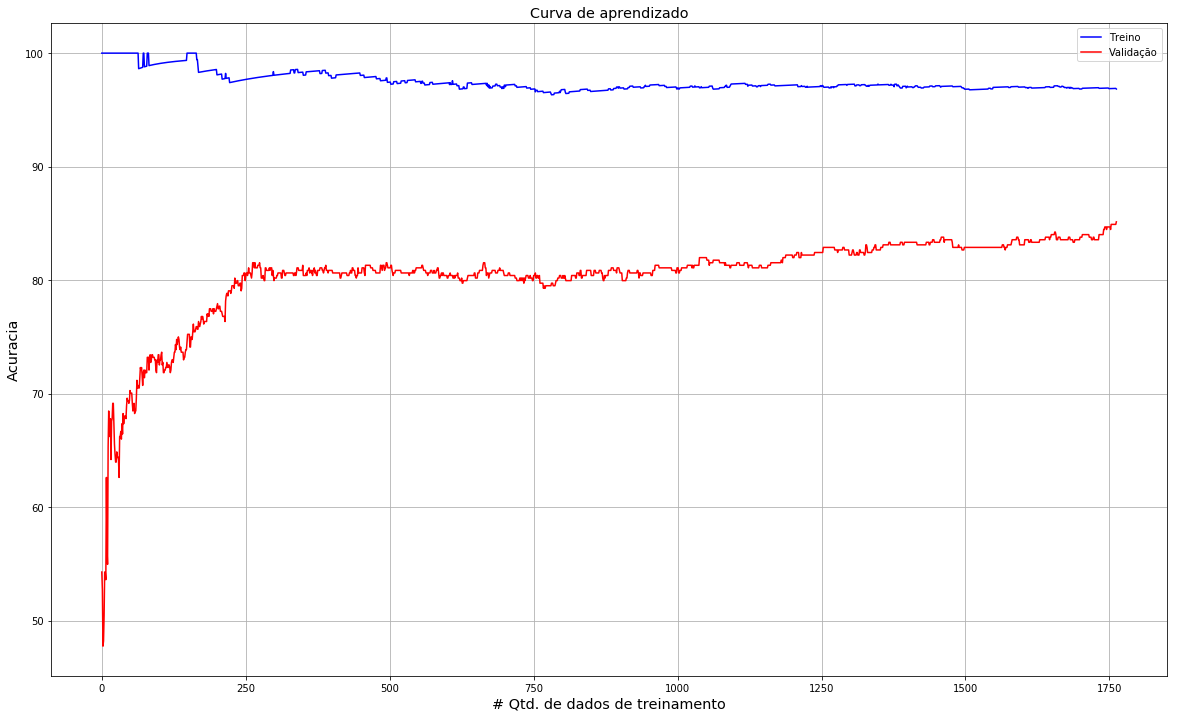

In [21]:
curva_aprendizado(Xtrain, Ytrain, Xvalid, Yvalid, bestC_radial, bestGamma_radial, 2)